In [0]:
from google.colab import drive,files

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# Imports go here

import pickle
import keras
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
from keras.layers import Dense, Activation,BatchNormalization
import pandas as pd
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.


In [0]:
# Directory path for train,validation and test X,Y1,Y2 in the form of serialized pickle files.

pickletraindata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_train_full.pkl'
picklevaldata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_val_full.pkl'
pickletestdata_X = 'gdrive/My Drive/DL Project/PickleFiles/vgg_features_test_full.pkl'

pickletraindata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y1.pkl'
picklevaldata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y1.pkl'
pickletestdata_Y1 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y1.pkl'

pickletraindata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTrainFull_Y2.pkl'
picklevaldata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleValFull_Y2.pkl'
pickletestdata_Y2 = 'gdrive/My Drive/DL Project/PickleFiles/pickleTestFull_Y2.pkl'

# Train files list path

train_x_list = 'gdrive/My Drive/DL Project/Data/SplitAndIngreLabel/TR.txt'

In [5]:
# Reading train_X from the pickle files into the session and reshaping it as 66071 samples of a 3-D array

train_X_list = pickle.load(open(pickletraindata_X, 'rb' ))
train_X = np.array(train_X_list)
train_X=train_X.reshape(len(train_X_list),7,7,512)
print(train_X.shape)

(66071, 7, 7, 512)


In [6]:
# Reading train_Y1 from the pickle files and changing it to a numpy array.

train_Y1_list = pickle.load(open(pickletraindata_Y1, 'rb' ))
train_Y1 = np.array(train_Y1_list)
print(train_Y1.shape)

(66071, 172)


In [7]:
# Reading train_Y2 from the pickle files and modifying the ingredinet vector to have {1,0}.

train_Y2_list = pickle.load(open(pickletraindata_Y2, 'rb' ))
train_Y2 = np.array(train_Y2_list)

for index in range(train_Y2.shape[0]):
  templist = train_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  train_Y2[index] = templist_0

print(train_Y2.shape)

(66071, 353)


In [8]:
# Reading val_X from the pickle files into the session and reshaping it as 11016 samples of a 3-D array

val_X_list = pickle.load(open(picklevaldata_X, 'rb' ))
val_X = np.array(val_X_list)
val_X=val_X.reshape(len(val_X_list),7,7,512)
print(val_X.shape)

(11016, 7, 7, 512)


In [9]:
# Loading val_Y1

val_Y1_list = pickle.load(open(picklevaldata_Y1, 'rb' ))
val_Y1 = np.array(val_Y1_list)
print(val_Y1.shape)

(11016, 172)


In [10]:
# Loading val_Y2

val_Y2_list = pickle.load(open(picklevaldata_Y2, 'rb' ))
val_Y2 = np.array(val_Y2_list)

for index in range(val_Y2.shape[0]):
  templist = val_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  val_Y2[index] = templist_0

print(val_Y2.shape)

(11016, 353)


In [11]:
# Loading test_X from the pickle files into the session and reshaping it as 11016 samples of a 3-D array

test_X_list = pickle.load(open(pickletestdata_X, 'rb' ))
test_X = np.array(test_X_list)

print(test_X.shape)

test_X=test_X.reshape(len(test_X_list),7,7,512)
print(test_X.shape)

# Loading test_Y1

test_Y1_list = pickle.load(open(pickletestdata_Y1, 'rb' ))
test_Y1 = np.array(test_Y1_list)
print(test_Y1.shape)

(33154, 1, 7, 7, 512)
(33154, 7, 7, 512)
(33154, 172)


In [12]:
# Loading test_Y2

test_Y2_list = pickle.load(open(pickletestdata_Y2, 'rb' ))
test_Y2 = np.array(test_Y2_list)

for index in range(test_Y2.shape[0]):
  templist = test_Y2[index]
  templist_0 = [0 if x==-1 else x for x in templist]
  test_Y2[index] = templist_0
  
print(test_Y2.shape)

(33154, 353)


### 1. Food Category Classification is a multi-class classification.We would like to check for class imbalance to decide the appropriate metric.

In [0]:
foodcategorymap = {}
with open(train_x_list) as fp:
  for line in fp:
    category = line.split("/")[1]
    if category in foodcategorymap.keys():
      foodcategorymap[category] = foodcategorymap[category] + 1
    else:
      foodcategorymap[category] = 1

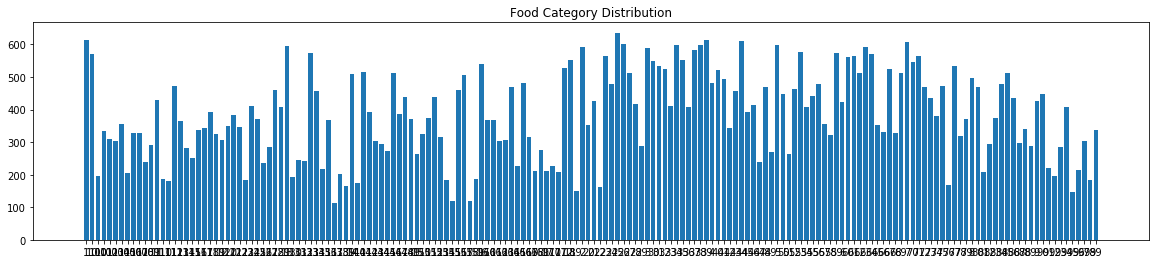

In [14]:
# Plotting the class distribution as categorical plot with number of samples for each category on y-axis.

import matplotlib.pyplot as plt
names = list(foodcategorymap.keys())
values = list(foodcategorymap.values())

fig, ax = plt.subplots(figsize=(20, 4))
ax.bar(names,values)
ax.set_title('Food Category Distribution')
plt.show()



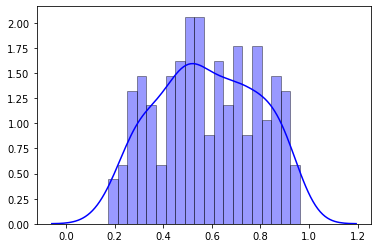

In [15]:
# Kernel Density Plot of percent representation of each class

import seaborn as sns
total =0;
for value in values:
  total = total +value;
percents=[]
for value in values:
  percent = (value/total) * 100
  percents.append(percent)

sns.distplot(percents, kde=True, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

   There is no major class imbalance issue with food-categorization and it is the frequency count of samples for each food category looks like a nornal distribution.We will use top-5 accuracy and precision to measure the model performance for this output.

### 2. Ingredient Recognition is a multi-label classification,so we will check for any class imbalance and decide the metric accordingly.

In [0]:
ingredientmap = {}
for itr in range(0,353):
  count =0
  for row in train_Y2:
    count = count + row[itr]
  ingredientmap[itr] = count

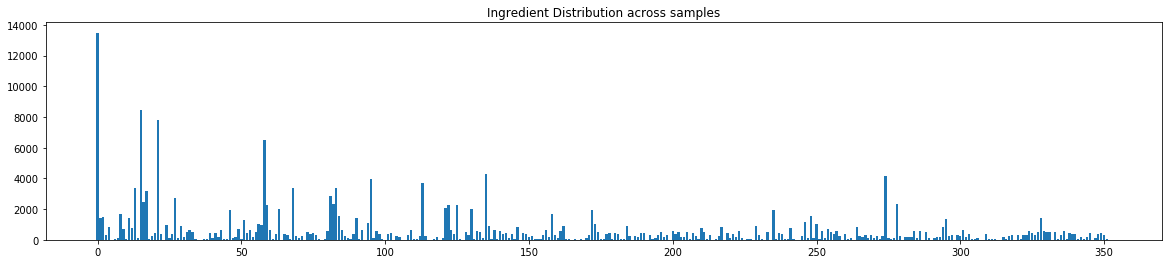

In [17]:
import matplotlib.pyplot as plt
names = list(ingredientmap.keys())
values = list(ingredientmap.values())

fig, ax = plt.subplots(figsize=(20, 4))
ax.bar(names,values)
ax.set_title('Ingredient Distribution across samples')
plt.show()

 We can see that Ingredient is a highly imbalanced data with few ingredients having very high representation.

In [0]:
# Defining top5 accuracy for food-categorization

import functools
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)
top5_acc.__name__ = 'top5_acc'

In [0]:
# Defining Macro-F1

def get_f1(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 2048)        9439232   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 1024)        18875392  
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 1024)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 1024)        9438208   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 1024)        0   

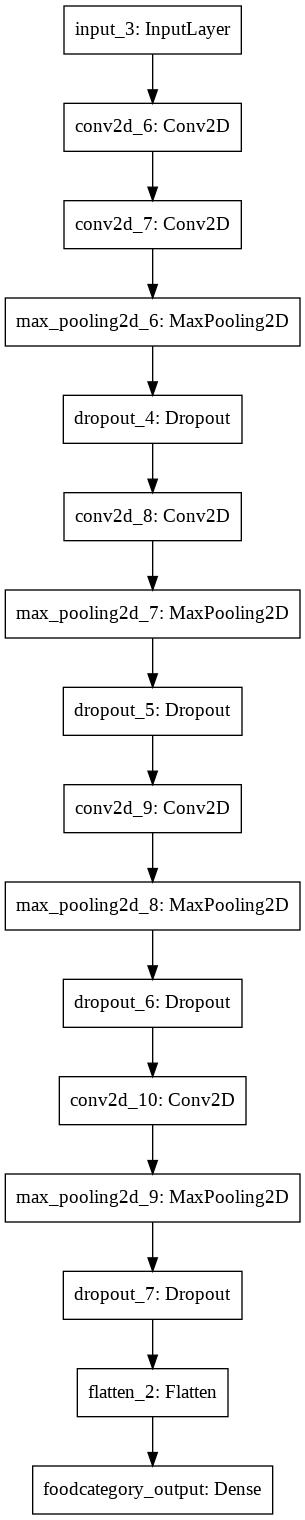

In [26]:
# Multi-class classification for food category using VGG16 as base model

inputs = Input(shape=(7,7,512))

conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.3)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.2)(maxPool2D3)

conv2D4 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.3)(maxPool2D4)

conv2D5 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.3)(maxPool2D5)

flattened5 = Flatten()(dropout5)

output1 = Dense(172,activation='softmax',name='foodcategory_output')(flattened5) ##  Food categorization

model_1 = Model(inputs=inputs, outputs=[output1])
print(model_1.summary()) # summarize layers
plot_model(model_1, to_file='Single-task Architecture Food Categorization.png') # plot graph
 

In [0]:
model_1.compile(optimizer=Adam(lr=0.0005),
              loss=['categorical_crossentropy'],
              metrics=[top5_acc,'accuracy'])

In [28]:
history_1 = model_1.fit(train_X, train_Y1, epochs=50, batch_size=256,validation_data=(val_X,val_Y1))

Train on 66071 samples, validate on 11016 samples
Epoch 1/50
66071/66071 [==============================] - 45s 679us/step - loss: 4.1829 - top5_acc: 0.2856 - acc: 0.1115 - val_loss: 2.7876 - val_top5_acc: 0.6325 - val_acc: 0.3135
Epoch 2/50
66071/66071 [==============================] - 43s 648us/step - loss: 2.4220 - top5_acc: 0.7058 - acc: 0.3966 - val_loss: 2.0001 - val_top5_acc: 0.7860 - val_acc: 0.5052
Epoch 3/50
66071/66071 [==============================] - 43s 650us/step - loss: 1.8209 - top5_acc: 0.8127 - acc: 0.5370 - val_loss: 1.7126 - val_top5_acc: 0.8247 - val_acc: 0.5736
Epoch 4/50
66071/66071 [==============================] - 43s 650us/step - loss: 1.4724 - top5_acc: 0.8630 - acc: 0.6177 - val_loss: 1.5974 - val_top5_acc: 0.8423 - val_acc: 0.6070
Epoch 5/50
66071/66071 [==============================] - 43s 648us/step - loss: 1.2198 - top5_acc: 0.8950 - acc: 0.6776 - val_loss: 1.5254 - val_top5_acc: 0.8508 - val_acc: 0.6332
Epoch 6/50
66071/66071 [=====================

In [23]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model_1.to_json()
with open('gdrive/My Drive/DL Project/Models/ModelA_OnlyFoodCategory.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_1.save_weights('gdrive/My Drive/DL Project/Models/ModelA_OnlyFoodCategory.h5')
print("Saved model to disk")

Saved model to disk


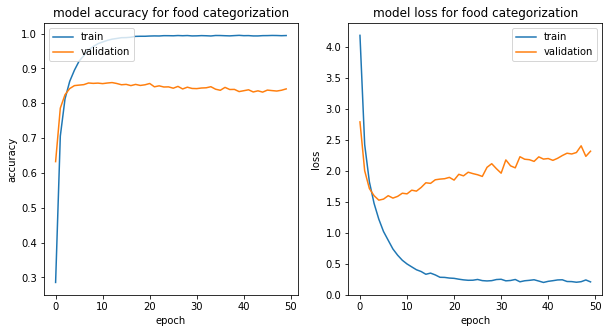

In [29]:
# Plotting the train,validation accuracy and loss statistics for food category classification.

fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['top5_acc'])
plt.plot(history_1.history['val_top5_acc'])
plt.title('model accuracy for food categorization')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss for food categorization')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [30]:
# Import the saved model in a new session:

from keras.models import model_from_json
# load json and create model
json_file = open('gdrive/My Drive/DL Project/Models/ModelA_OnlyFoodCategory.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('gdrive/My Drive/DL Project/Models/ModelA_OnlyFoodCategory.h5')
print("Loaded model from disk")


Loaded model from disk


In [31]:
loaded_model

In [0]:
loaded_model.compile(optimizer=Adam(lr=0.001),
              loss=['categorical_crossentropy'],
              metrics=[top5_acc,'accuracy'])

In [33]:
results = model_1.evaluate(test_X,test_Y1,batch_size=128)
print(results)


33154/33154 [==============================] - 10s 291us/step
[2.393728897358451, 0.8362188574530977, 0.6596790734149726]


In [0]:
model_1.metrics_names

['loss', 'top5_acc', 'acc']

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 2048)        9439232   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 1024)        18875392  
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 1024)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 1024)        9438208   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 1024)        0   

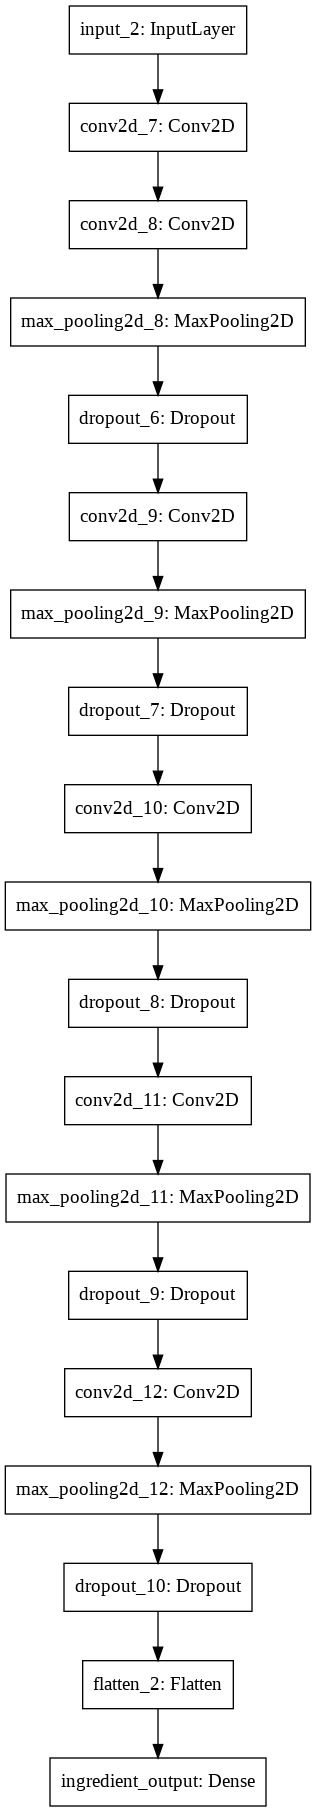

In [0]:
# Multi-label classification for ingredient recognition using VGG16 as base model

inputs = Input(shape=(7,7,512))

conv2D1 = Conv2D(2048, kernel_size=3, activation='relu',padding='same')(inputs)
maxPool2D1 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D1)

conv2D2 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(conv2D1)
maxPool2D2 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D2)
dropout2 = Dropout(0.5)(maxPool2D2)

conv2D3 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout2)
maxPool2D3 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D3)
dropout3 = Dropout(0.5)(maxPool2D3)

conv2D4 = Conv2D(1024, kernel_size=3, activation='relu',padding='same')(dropout3)
maxPool2D4 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D4)
dropout4 = Dropout(0.5)(maxPool2D4)

conv2D5 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout4)
maxPool2D5 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D5)
dropout5 = Dropout(0.5)(maxPool2D5)

conv2D6 = Conv2D(512, kernel_size=3, activation='relu',padding='same')(dropout5)
maxPool2D6 = MaxPooling2D(pool_size=(2,2),padding='same')(conv2D6)
dropout6 = Dropout(0.3)(maxPool2D6)

flattened6 = Flatten()(dropout6)

output2 = Dense(353,activation='sigmoid',name='ingredient_output')(flattened6)  ##  Ingredient recognition

model_2 = Model(inputs=inputs, outputs=[output2])
print(model_2.summary()) # summarize layers
plot_model(model_2, to_file='Single-task Architecture Ingredient Recognition.png') # plot graph

In [0]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 2048)        9439232   
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 1024)        18875392  
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 1024)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 4, 4, 1024)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 1024)        9438208   
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 2, 2, 1024)        0   

In [0]:
model_2.compile(loss={'ingredient_output': 'binary_crossentropy'}, optimizer=Adam(lr=0.001), metrics=[get_f1])
history_2 = model_2.fit(train_X, train_Y2, epochs=50, batch_size=256,validation_data=(val_X,val_Y2))

Train on 66071 samples, validate on 11016 samples
Epoch 1/50
66071/66071 [==============================] - 49s 747us/step - loss: 0.0659 - get_f1: 0.0058 - val_loss: 0.0485 - val_get_f1: 0.0000e+00
Epoch 2/50
66071/66071 [==============================] - 48s 723us/step - loss: 0.0427 - get_f1: 1.9383e-05 - val_loss: 0.0444 - val_get_f1: 0.0000e+00
Epoch 3/50
66071/66071 [==============================] - 47s 716us/step - loss: 0.0417 - get_f1: 0.0000e+00 - val_loss: 0.0411 - val_get_f1: 0.0000e+00
Epoch 4/50
66071/66071 [==============================] - 47s 718us/step - loss: 0.0410 - get_f1: 0.0037 - val_loss: 0.0401 - val_get_f1: 0.0046
Epoch 5/50
66071/66071 [==============================] - 47s 719us/step - loss: 0.0393 - get_f1: 0.0165 - val_loss: 0.0381 - val_get_f1: 6.8050e-05
Epoch 6/50
66071/66071 [==============================] - 48s 726us/step - loss: 0.0373 - get_f1: 0.0394 - val_loss: 0.0348 - val_get_f1: 0.0573
Epoch 7/50
66071/66071 [==============================] 

In [0]:
# serialize model to JSON
model_json = model_2.to_json()
with open('gdrive/My Drive/DL Project/Models/ModelA_OnlyIngredient.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_2.save_weights('gdrive/My Drive/DL Project/Models/ModelA_OnlyIngredient.h5')
print("Saved model to disk")

Saved model to disk


In [0]:
# Import the saved model in a new session:

from keras.models import model_from_json
# load json and create model
json_file = open('gdrive/My Drive/DL Project/Models/ModelA_OnlyIngredient.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights('gdrive/My Drive/DL Project/Models/ModelA_OnlyIngredient.h5')
print("Loaded model from disk")

In [0]:
loaded_model

In [0]:
loaded_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=[get_f1]))

In [0]:
results = model_2.evaluate(test_X,test_Y2,batch_size=128)
print(results)

33154/33154 [==============================] - 10s 314us/step
[0.02504905348052293, 0.36543402559558613]


In [0]:
model_2.metrics_names

['loss', 'get_f1']

In [0]:
print('Generate predictions for all samples')
predictions = model_2.predict(test_X)
print(len(test_X))

Generate predictions for all samples


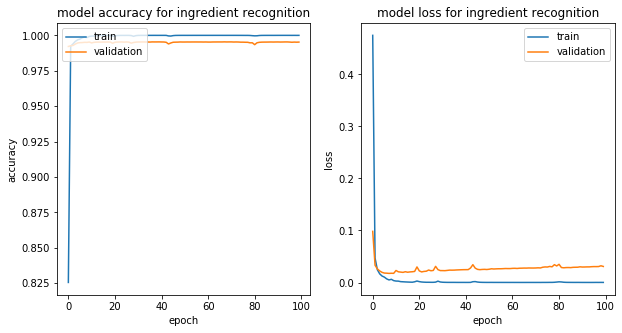

In [0]:
# Plotting the train,validation accuracy and loss statistics for ingredient identification.

fig = plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['get_f1'])
plt.plot(history_2.history['val_get_f1'])
plt.title('model Macro-f1 for ingredient recognition')
plt.ylabel('Macro-f1')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss for ingredient recognition')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
predictions = model_2.predict(test_X)
predictions_ingredients=1*(predictions >= 0.5)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_Y2, predictions_ingredients))

              precision    recall  f1-score   support

           0       0.67      0.27      0.38      6698
           1       0.72      0.27      0.39       666
           2       0.33      0.00      0.00       731
           3       0.92      0.15      0.26       144
           4       0.73      0.61      0.66       435
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        24
           7       0.00      0.00      0.00        46
           8       0.60      0.18      0.28       868
           9       0.00      0.00      0.00       365
          10       0.00      0.00      0.00        41
          11       0.71      0.15      0.25       699
          12       0.62      0.10      0.17       387
          13       0.79      0.13      0.22      1639
          14       0.00      0.00      0.00        76
          15       0.78      0.16      0.27      4353
          16       0.67      0.05      0.09      1138
          17       0.74    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


We also want to see if downsampling the ingredient dataset with imbalanced classes can improve the F1 score of the model.
